# _MNIST Dataset_

<img src="images/MNIST.png"/>

### About

MNIST(Modified National Institute of Standards and Technology) is a sub data set of NIST(National Institute of Standards and Technology), a large database of handwritten digits. MNIST is used to train image processing systems and is basically the "hello world" of computer vision.

MNIST contains 60,000 training images and 10,000 testing images. Training images are used to train a system, and testing images are used to test the trained system.

### This Notebook

This notebook will aim to explain the famous MNIST data set. I aim to show you various methods of loading the dataset into memory for use.

---

#### Downloading the dataset

For the following notebook, I use a serious of files which can be downloaded from [here](http://yann.lecun.com/exdb/mnist/). Once you have them downloaded you can create a directory on your machine called __data__ and drop the files for use in here.

The pictures of the numbers are stored as .idx files in the zipped folder. So, we are going to have to figure out how to handle these files...

In [1]:
# Import gzip to unzip our files
import gzip

# Using gzip we just import, open the zip files contained in our data folder
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as file:
    file_content = file.read()  

# Print the first 4 elements of our file to make sure we're opening it properly
file_content[0:4]

b'\x00\x00\x08\x03'

---

## Read the files

#### Reading the IDX files

The first task is to try read the __IDX__ files which are contained in the zipped folders.

Each vector in the matrix consists of 784 pixels (28x28 pixel images). We can load each 784 set into a 28X28 numpy array as an unassigned 8 bit integer.

In [2]:
# Import numpy as np
import numpy as np

# convert data to 28x28 array
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

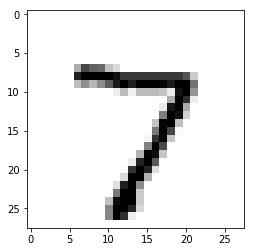

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

#### Reading label data

The label files are formatted similar to the image files. The first 4 bytes give us information about the file

In [4]:
# read labels from file
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

print("Magic Number    : ", labels[4:8])  
print("Number of items : ", int.from_bytes(labels[4:8], byteorder="big"))  

# Display label as bytes    
print("Display label as bytes   : ", labels[8:9])
# Display  label as int
print("Display label as an integer : ", int.from_bytes(labels[8:9], byteorder="big"))

Magic Number    :  b"\x00\x00'\x10"
Number of items :  10000
Display label as bytes   :  b'\x07'
Display label as an integer :  7


---

## Python functions & MNIST

So now we know how to work with the dataset; we have parsed the data for the _.idx_ files and displayed the first image within the dataset, and we've also displayed the integer based off the label data from the same dataset.

The next step is to create python functions that can read the images and labels folders and display the information for them, such as:
    - Magic Number
    - File length
    - Return a list of labels (be mindful of your processing power)

---

In [5]:
# Importing PIL to convert arrays into images.
from PIL import Image

In [6]:
def read_labels(file):
    try:
        with gzip.open(file) as f:
            # Magic number - *Expected to be 2049*
            magic_num = int.from_bytes(f.read(4), byteorder="big")

            # Number of Labels - *Expected to be 60000 training file labels & 10000 testing file labels*
            no_labels = int.from_bytes(f.read(4), byteorder="big")
            
            print("File:",file,"\nMagic number: \t\t%10d\nNumber of Images: \t%10d\n"%(magic_num,no_labels))
            
            # Create a list of labels -
            # I don't have the processing power to loop over each label/image so I just use the first
            # n images where n = no_labels / 1000. I can assume if it works for n images, it will work for
            # all of the images.
            # Looping over the number of labels divided 1000 and reading in each label 1 by 1.
            label_list = [int.from_bytes(f.read(1), byteorder="big") for i in range(int(no_labels / 1000))]
            
            return label_list
    finally:
        f.close()

# read_images will read the image files and return a list of pixels for each image.
def read_images(file):
    try:
        with gzip.open(file) as f:
            # Magic number - *Expected to be 2051*
            magic_num = int.from_bytes(f.read(4), byteorder="big")

            # Number of images - *Expected to be 60000 training files & 10000 testing files*
            no_images = int.from_bytes(f.read(4), byteorder="big")

            # Number of rows - *Expected to be 28*
            no_rows = int.from_bytes(f.read(4), byteorder="big")

            # Number of columns - *Expected to be 28*
            no_cols = int.from_bytes(f.read(4), byteorder="big")

            # Print out file details.
            # If parsed correctly, the values should be the same as the expected.
            print("File:",file,"\nMagic number: \t\t%10d\nNumber of Images: \t%10d\nNumber of Rows: \t%10d\nNumber of Columns: \t%10d\n" %(magic_num,no_images,no_rows,no_rows))

            pixel_list = [[[int.from_bytes(f.read(1), byteorder="big")for i in range(no_cols)] for j in range(no_rows)] for k in range(int(no_images / 1000))]

            # Return the list of pixels to be used in different functions.
            return pixel_list
    finally:
        # Close the file after using it.
        f.close()

# print_image will recieve a list of pixels and print out a visual representation of the image to the console.
def print_image(pixel_list):
    # Loop over the number of rows in the pixel list.
    for i in pixel_list:
        # Prints out a new line after each row.
        print("\n")
        # Loop over the number of columns in the rows
        for j in i:
            # If the column value is less than 128, print out "." - This represents a white pixel.
            if( j < 128):
                print(".", end="")
            # Or else if the column is greater than 128, print out "#" - This represents a black pixel.
            else:
                print("#", end="")

def save_image(pixel_list, index, label, train_test):
    # Instantiate an empty string.
    file_format = ""

    # If the train_test value is true, change the empty string to "train-xxxxx-y" format.
    if(train_test):
        # Using the string format %05d and %d to add variables to the string.
        # %05d adds 0s to the left if not enough integers.
        file_format = "images/train-%05d-%d.png"
    # If the train_test value is false, change the empty string to "test-xxxxx-y" format.
    else:
        # Using the string format %05d and %d to add variables to the string.
        # %05d adds 0s to the left if not enough integers.
        file_format = "images/test-%05d-%d.png"
    
    # Using numpys .array() function to turn the list into a numpy array.
    pixel_array = np.array(pixel_list)

    # Turn the array into an image, using Pillow's Image.fromarray() 
    # to an image memory from an object exporting the array interface and converting to
    # "RGB" to save file locally.
    image = Image.fromarray(pixel_array).convert("RGB")

    # Saving the file and inserting the correct variables into the string for the "train/test-xxxxx-y" format.
    image.save(file_format %(index,label))

    
# A try/catch to inform the user that the data files are non existent if the files fail to load.
try:
    # List of labels for the training images.
    training_labels = read_labels("data/train-labels-idx1-ubyte.gz")
    # List of pixels representing the training images.
    training_images = read_images("data/train-images-idx3-ubyte.gz")
    # List of labels for the testing images.
    testing_labels = read_labels("data/t10k-labels-idx1-ubyte.gz")
    # List of pixels representing the testing images.
    testing_images = read_images("data/t10k-images-idx3-ubyte.gz")

    # Call the print_image function to print out the 3rd image to the screen
    print_image(training_images[2])

    # Loop that starts at 1, the length of training/testing_images+1 and increments by 1.
    # Each iteration will save the image at the current index i - 1 (as the loop starts at 1 and ends at 60).
    for i in range(1,len(training_images)+1,1):
        save_image(training_images[i-1], i, training_labels[i-1], True)

    for i in range(1,len(testing_images)+1,1):
        save_image(testing_images[i-1], i, testing_labels[i-1], False)
except:
    print ("Trouble opening the gzip MNIST files. Make sure the 'data' directory is created and the MNIST dataset is downloaded.")

File: data/train-labels-idx1-ubyte.gz 
Magic number: 		      2049
Number of Images: 	     60000

File: data/train-images-idx3-ubyte.gz 
Magic number: 		      2051
Number of Images: 	     60000
Number of Rows: 	        28
Number of Columns: 	        28

File: data/t10k-labels-idx1-ubyte.gz 
Magic number: 		      2049
Number of Images: 	     10000

File: data/t10k-images-idx3-ubyte.gz 
Magic number: 		      2051
Number of Images: 	     10000
Number of Rows: 	        28
Number of Columns: 	        28



............................

............................

............................

............................

............................

.....................#......

.....................#......

.....#..............##......

....##..............##......

....##.............##.......

....##.............##.......

....##.............##.......

...##.............###.......

...##............###........

...##.......########........

...############...##........

.....#####....

#### References
- https://stackoverflow.com/questions/12902540/read-from-a-gzip-file-in-python
- https://stackoverflow.com/questions/2872381/how-to-read-a-file-byte-by-byte-in-python-and-how-to-print-a-bytelist-as-a-binar
- https://stackoverflow.com/questions/1035340/reading-binary-file-and-looping-over-each-byte
- https://stackoverflow.com/questions/10668341/create-3d-array-using-python
- https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image
- https://stackoverflow.com/questions/4711880/pil-using-fromarray-with-binary-data-and-writing-coloured-text
- https://stackoverflow.com/questions/339007/nicest-way-to-pad-zeroes-to-string